# Target to predict charges which is  quantative 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [2]:
df.shape

(1338, 7)

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()  

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.isnull().sum() #number of null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.isna().count() ##num of non null values

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

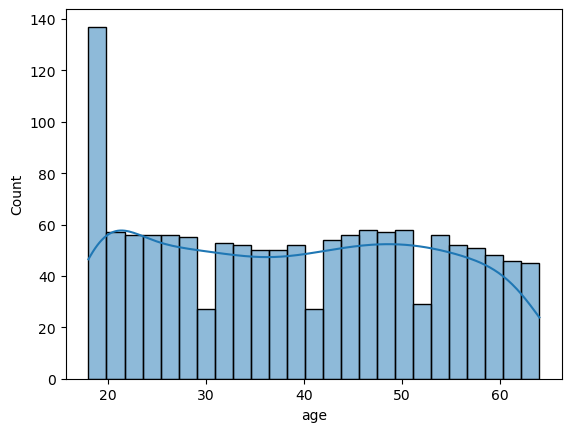

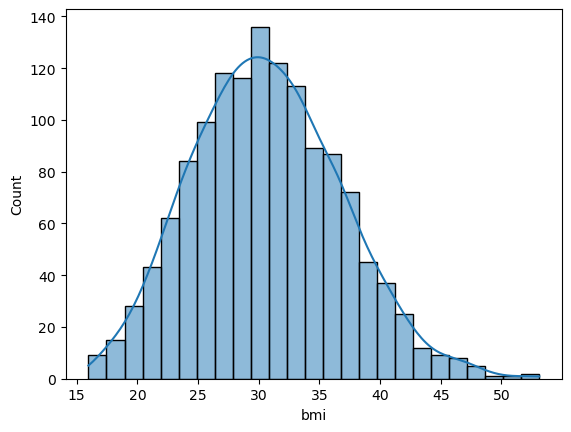

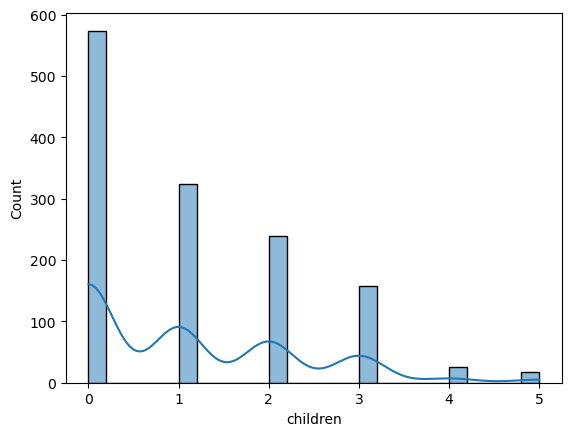

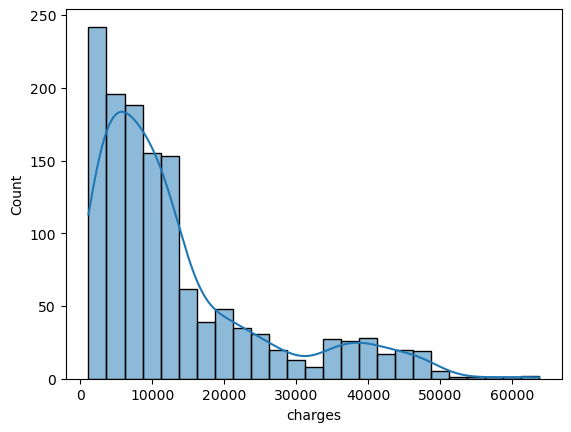

In [10]:
numeric_cols=['age', 'bmi', 'children', 'charges'] ##select the quantative colums so we can plot them
for col in numeric_cols:
    plt.figure();
    sns.histplot(df[col],kde=True,bins=25)

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

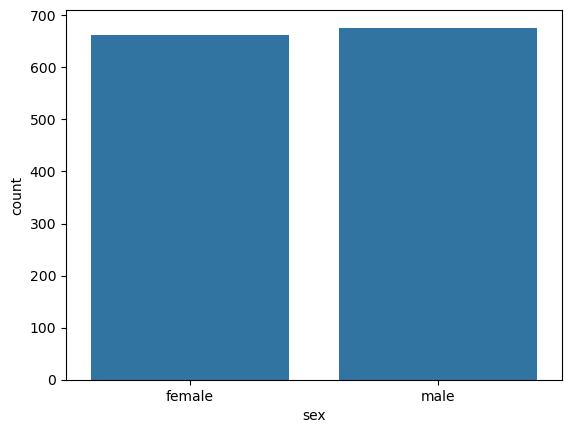

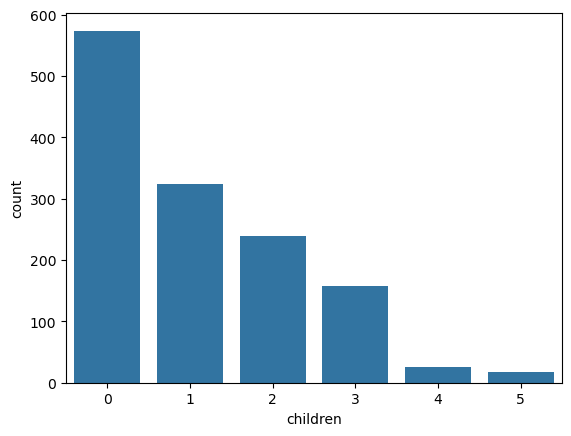

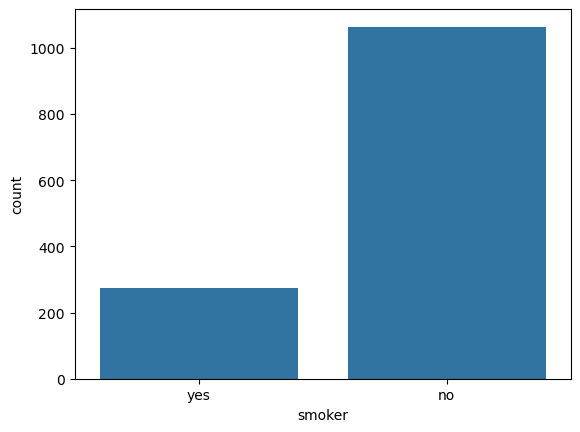

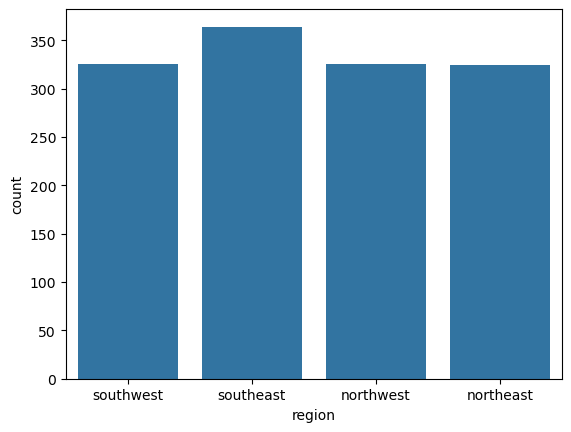

In [12]:
catagorical_cols=['sex','children','smoker','region']
for col in catagorical_cols:
    plt.figure()
    sns.countplot(data=df,x=col)

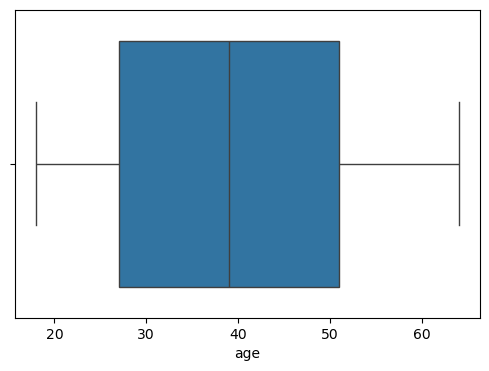

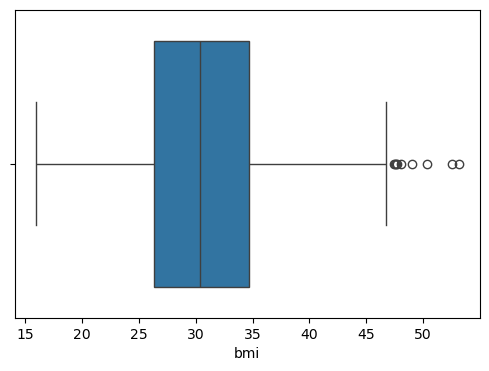

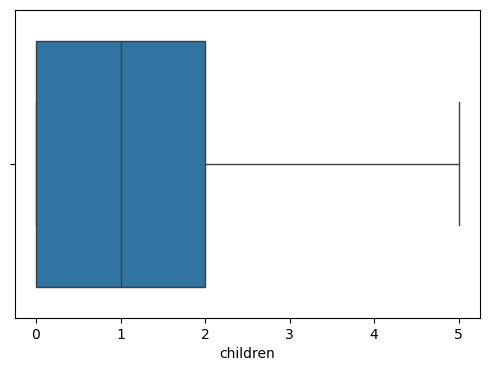

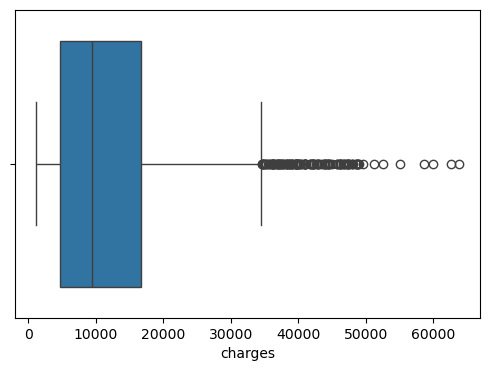

In [13]:
for col in numeric_cols:
    plt.figure(figsize=(6,4)) ##specifiy this figsize , not doing anything here but looks good usually
    sns.boxplot(data=df,x=col)

# check corelation using heatmap of seaborn

<Axes: >

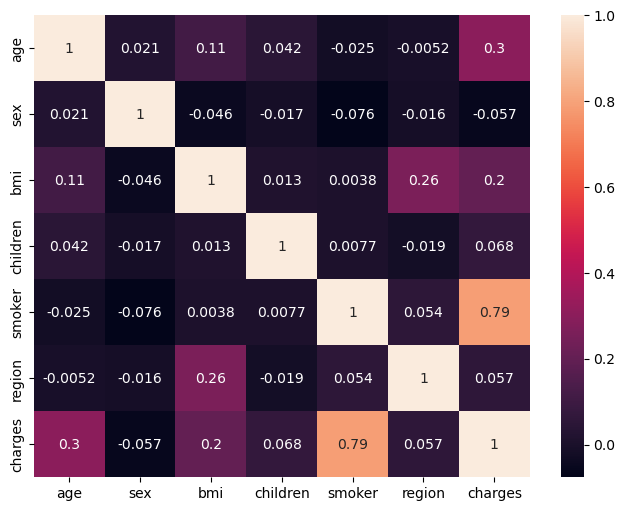

In [14]:
#to see correlation but df.corr() only works with numeric cols so either use numeric cols or encode it to numeric 
df_encode=df.copy()
df_encode['sex']=df_encode['sex'].map({'male':0,'female':1})
df_encode['smoker']=df_encode['smoker'].map({'yes':1,'no':0})
df_encode['region']=df_encode['region'].map({'northwest':1,'northeast':2,'southwest':3,'southeast':4})#its wrong to assing values like this 
plt.figure(figsize=(8,6))
sns.heatmap(df_encode.corr(),annot=True)

<Axes: >

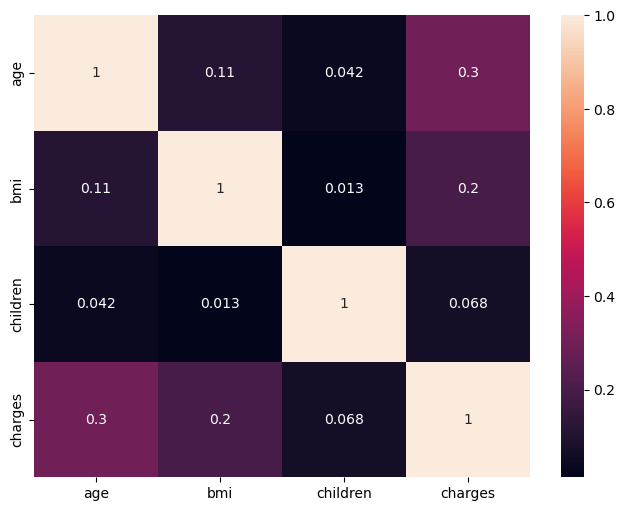

In [15]:
#lets only use numeric cols this time 
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# data cleaning and preprocessing

In [16]:
#its already cleaned , no null vals
df_clean=df.copy()
df_clean.shape

(1338, 7)

In [17]:
df_clean.drop_duplicates(inplace=True)
df_clean.shape

(1337, 7)

In [18]:
df_clean.isna().sum() #no null , else we would have to fill them with fill na 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# before encoding lets analyze the catagorical values

In [19]:
df_clean['sex'].value_counts() #male and Male gets counted differently so we need to know if the data is like that 

sex
male      675
female    662
Name: count, dtype: int64

In [20]:
df_clean['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [21]:
df_clean['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

# encode 

In [22]:
df_clean.dtypes #check what kinda variable types  we have , we need to encode catagorical to numerical (objects to int )

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
df_clean['sex']=df_clean['sex'].map({"male":0,"female":1})
df_clean['smoker']=df_clean['smoker'].map({"yes":1,"no":0})

#rename the columns for better understanding 
df_clean.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker'
}, inplace=True)
df_clean

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


# HOt encoding of the region

In [24]:
df_clean=pd.get_dummies(df_clean,columns=['region'],drop_first=True) #divide the region col into new cols of containing category

In [25]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False
1334,18,1,31.920,0,0,2205.98080,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,True


In [26]:
# now convert the true false into 1 and 0
#could've used map like we did in smoker and sex but thats inefficient and manual 
df_clean=df_clean.astype(int)

In [27]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# feature engineering and extraction

## adding a new column

In [28]:
#lets add a new col of bmi catagory ,based on the bmi column using pandas cut function
df_clean['bmi_category']=pd.cut(
    df_clean['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['underweight','normal','overweight','obese']
)
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,overweight
1,18,0,33,1,0,1725,0,1,0,obese
2,28,0,33,3,0,4449,0,1,0,obese
3,33,0,22,0,0,21984,1,0,0,normal
4,32,0,28,0,0,3866,1,0,0,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,obese
1334,18,1,31,0,0,2205,0,0,0,obese
1335,18,1,36,0,0,1629,0,1,0,obese
1336,21,1,25,0,0,2007,0,0,1,overweight


In [29]:
#the new colum of bmi_category is categorical so we need to convert it to numericabs
#but it has 4 different valuse so we need to create dummies like we did in region 
df_clean['bmi_category'].value_counts()

bmi_category
obese          706
overweight     386
normal         221
underweight     24
Name: count, dtype: int64

In [30]:
df_clean=pd.get_dummies(df_clean,columns=['bmi_category'],drop_first=True)
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [31]:
df_clean=df_clean.astype(int)
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [32]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'],
      dtype='object')

In [33]:
df_clean.dtypes

age                        int64
is_female                  int64
bmi                        int64
children                   int64
is_smoker                  int64
charges                    int64
region_northwest           int64
region_southeast           int64
region_southwest           int64
bmi_category_normal        int64
bmi_category_overweight    int64
bmi_category_obese         int64
dtype: object

# feature scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=['age','bmi','children']
df_clean[cols]=scaler.fit_transform(df_clean[cols])
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


<Axes: >

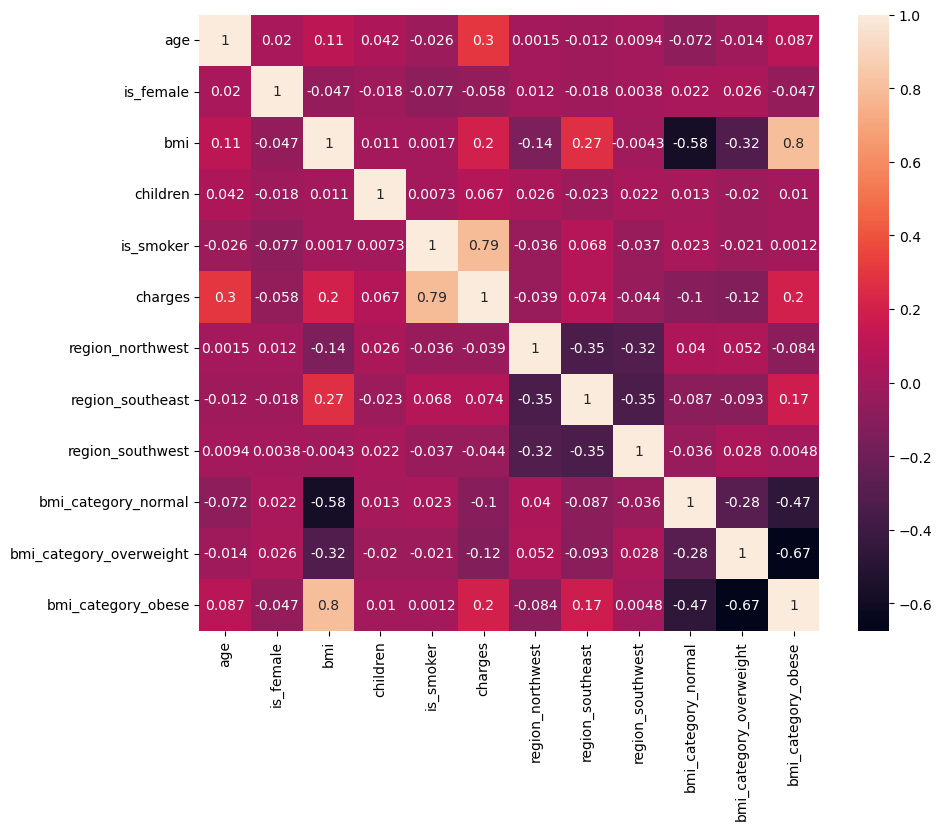

In [35]:
#the heat map by default uses the pearson correlation 
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(),annot=True)

## pearson correlation manual mehod

In [36]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'
]

correlations = {
    feature: pearsonr(df_clean[feature], df_clean['charges'])[0]
    for feature in selected_features
}

# pearsonr() returns two values:

# [0] → the correlation coefficient (how strongly they are related).

# [1] → the p-value (statistical significance).

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_normal,-0.104042


In [37]:
#without dictionary comprehension

correlations = {}
for feature in selected_features:
    correlations[feature] = pearsonr(df_clean[feature], df_clean['charges'])[0]
    
correlation_df1 = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df1.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_normal,-0.104042


In [38]:
# now ive the corr of all the feature aginst the target (charges)
#but for categorical feature we should not rely on pearson corr 
# pearson = numeric vs nnumeric
# annova / t test= categorical vs numeric 
# chi square test= categorical vs categorical 

In [39]:
# here we can use annova , t test 
# but ill use chi square by turning the charges into category so it becomes category vs category

In [40]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'
]

In [41]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_clean['charges_bin'] = pd.qcut(df_clean['charges'], q=4, labels=False)
# charges_bin is a categorical variable representing quartiles of charges.
# Now you can run a Chi-square test between charges_bin and your categorical features

chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_clean[col], df_clean['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [42]:
#now according to the result drop or keep the feature 

In [43]:
final_df = df_clean[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_obese']]

In [44]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0
